In [1]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
# 한글설정
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈

# 다른 폰트를 기본으로 하려면
import matplotlib.font_manager as fm
font_path = "c:/Windows/Fonts/HMFMPYUN.TTF"
font_name = fm.FontProperties(fname=font_path,
                             size=10).get_name()
plt.rc('font', family=font_name)

plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 안 보이게

df_first = pd.read_csv('d:/ai/downloads/shareData/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding='cp949') # euc-kr 2350개 문자 이상은 깨짐(한글완성형)
df_first.sample(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215


In [2]:
df_first_heat = df_first.set_index('지역')

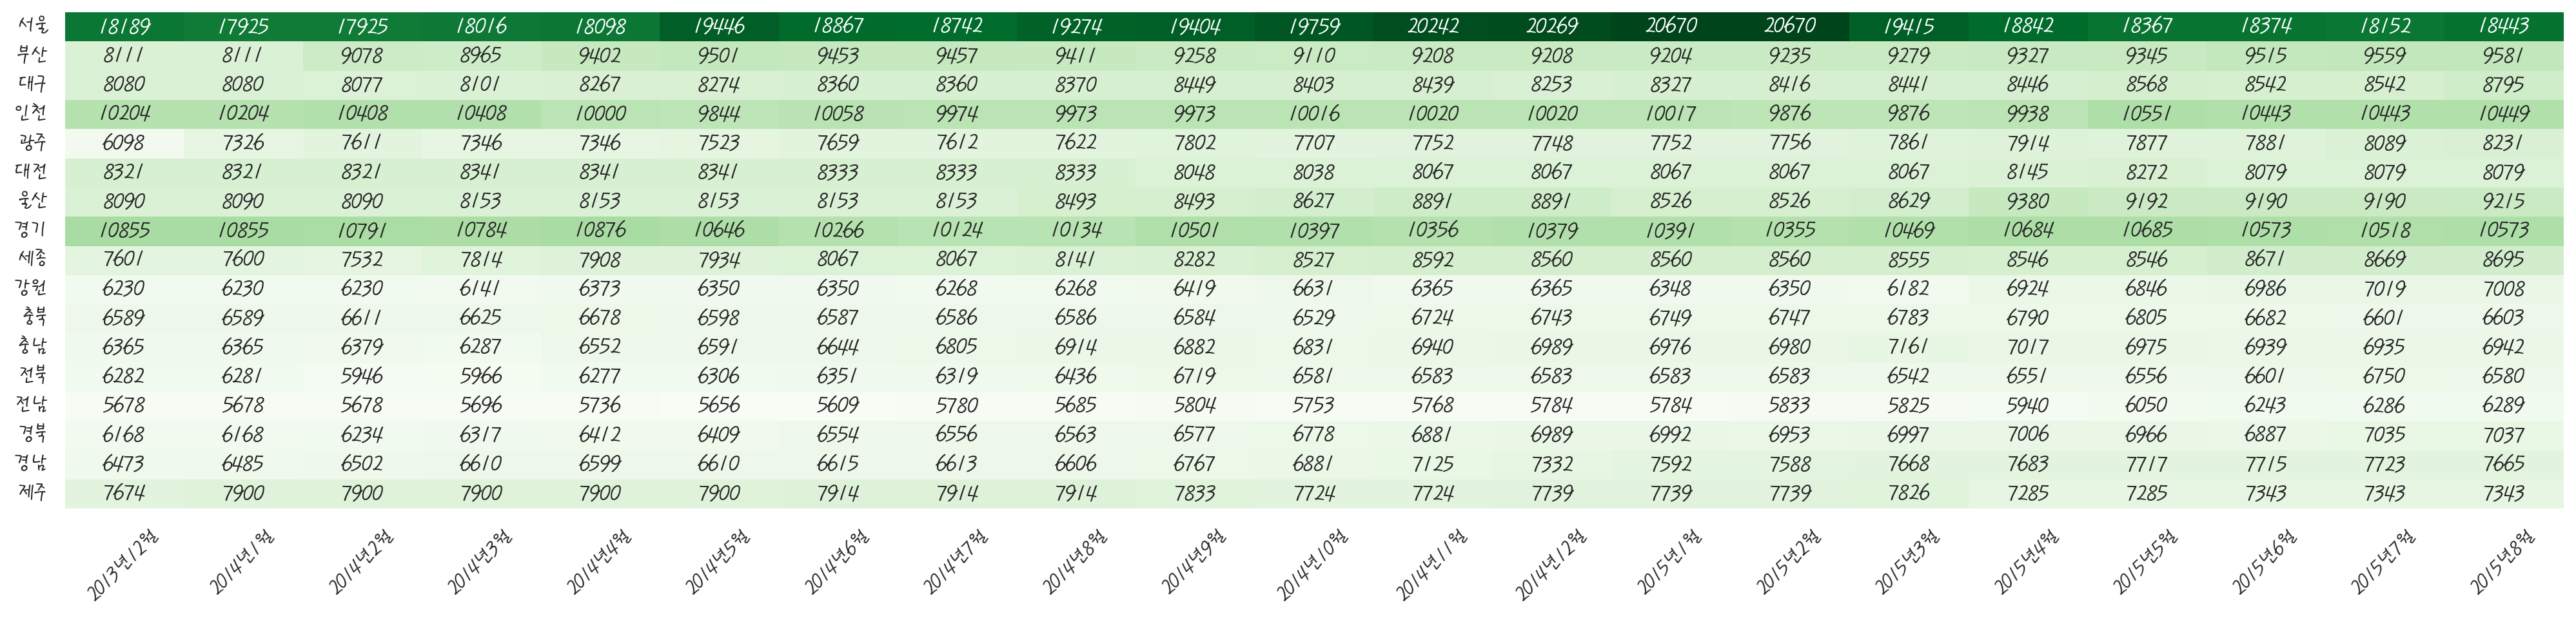

In [3]:
plt.figure(figsize=(25,5))
sns.heatmap(df_first_heat, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xticks(rotation=45)
plt.ylabel(None)
plt.show()

In [4]:
df_last = pd.read_csv('D:/ai/downloads/shareData/부동산/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [5]:
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].str.strip().str.replace(',','')

In [6]:
df_last['제곱미터당분양가격'] = pd.to_numeric(df_last['제곱미터당분양가격'])
df_last['평당분양가격'] = df_last['제곱미터당분양가격']*3.3

In [7]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7


In [9]:
df_last = df_last.drop('분양가격(제곱미터)', axis=1) # 열 제거
df_last.head(1)

,지역명,규모구분,연도,월,제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3


In [10]:
df_last = df_last.drop('제곱미터당분양가격', axis=1) # 열 제거
df_last.head(1)

,지역명,규모구분,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3


In [11]:
df_last

,지역명,규모구분,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,19400.7
...,...,...,...,...,...
9090,제주,모든면적,2024,8,25419.9
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,24799.5
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [14]:
result = df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack()
result

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


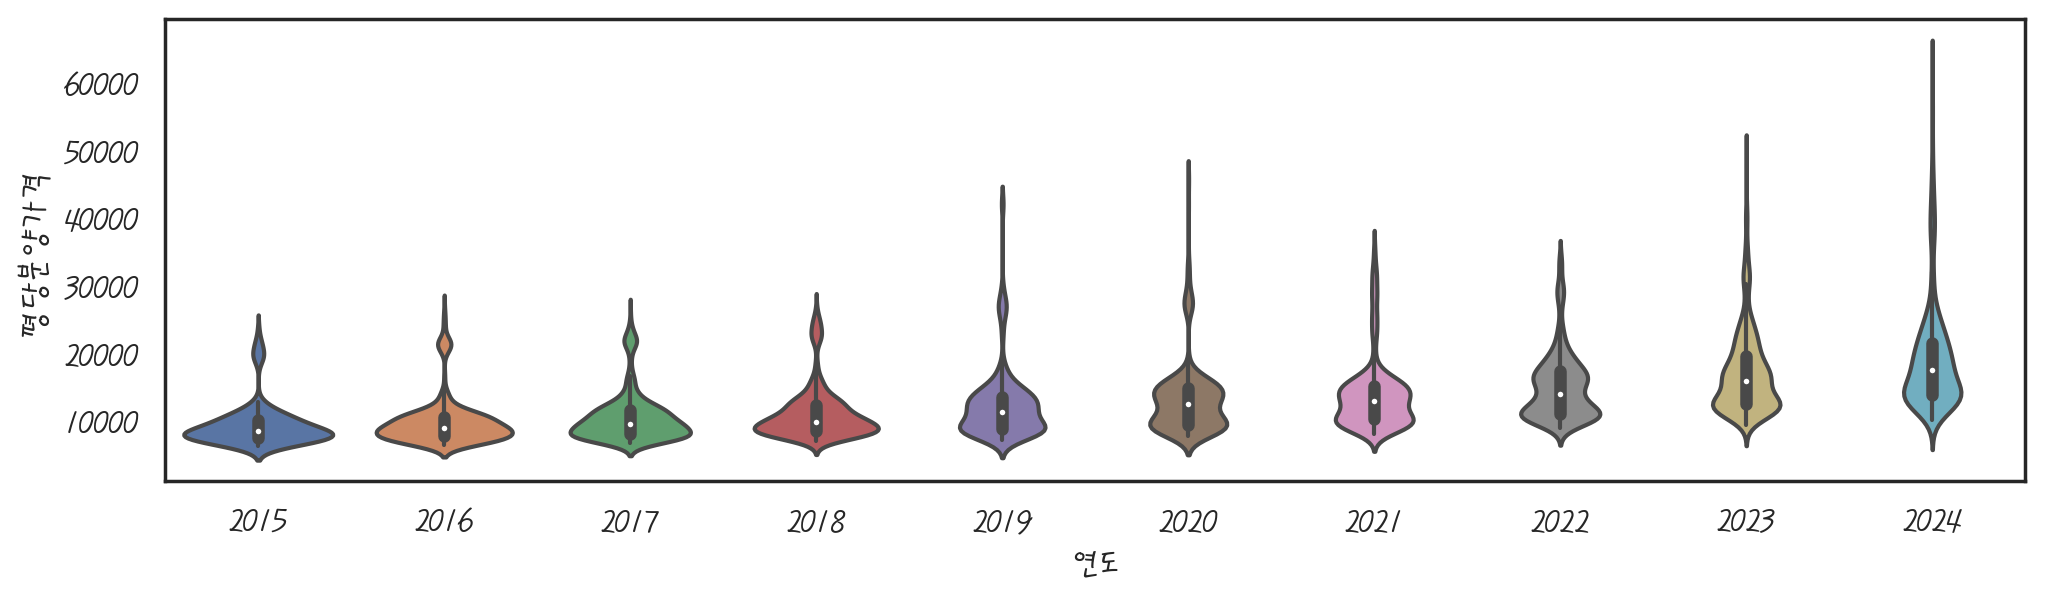

In [15]:
sns.violinplot(data=df_last, x='연도', y='평당분양가격') # 필도(분포) 추정 포함
plt.show()

In [16]:
new_first = df_first.melt(id_vars='지역',
                         var_name='연도월',
                         value_name='평당분양가격')
new_first.head(1)

,지역,연도월,평당분양가격
0,서울,2013년12월,18189


In [17]:
new_first["연도"] = new_first["연도월"].apply(lambda x : int(x.split("년")[0]))
new_first["월"] = new_first["연도월"].map(lambda x : int(x.split("년")[-1][:-1]))